# Beyond Ping Pong
This notebook contains a possible thing to look at during the Heidelberg Workshop

The fundamental idea is that we can use techniques from weather forecasting to 'post-process' a near-term future projection, by considering the past millennium as a kind of hindcast.

In [1]:
import xarray as xr

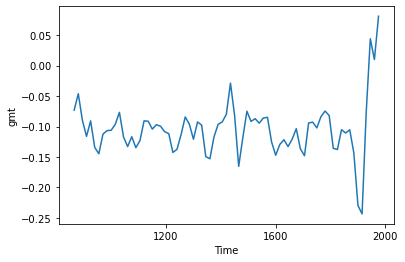

In [22]:
# Load in the Last Millennium Reanalysis (anomalies w.r.t. 1951-1980)
lmr=xr.open_dataset("data\LastMillenniumReanalysis_gmt_MCruns_ensemble_full.nc")
lmr_gmt=lmr.gmt.mean(("members","MCrun")) # Compute ensemble mean, annual mean values
lmr_smoothed=lmr_gmt.rolling(time=30,center=True).mean() # Perform 30 year running mean
lmr_samples=lmr_smoothed[865::15]
lmr_samples.plot()

In [17]:
lme=xr.open_dataset("data\CESM1_LastMillenniumEnsemble.001-010.tas_global_avg_mon.850-2005.nc")
lme_gmt_mon=lme.tas_global_avg_mon #Load in monthly global mean temperatures
lme_5180 = lme_gmt_mon.sel(time=slice("1951-01", "1980-12")).mean() # Compute the average over L.M.Reanalysis baseline
lme_gmt = lme_gmt_mon.groupby("time.year").mean()
lme_gmt_mon = lme_gmt_mon.rolling(time=30*12,center=True).mean() # Perform 30 year running mean
lme_samples=lme_gmt_mon[:,180:13690:180]
lme_samples=lme_samples-lme_5180
lme_gmt

<xarray.DataArray 'tas_global_avg_mon' (record: 10, year: 1156)>
array([[0.1198381 , 0.3904111 , 0.36505905, ..., 0.5848511 , 0.56194574,
        0.57666326],
       [0.11064947, 0.2568973 , 0.17207913, ..., 0.4697264 , 0.46567318,
        0.44605836],
       [0.1778479 , 0.36125347, 0.36925945, ..., 0.32920364, 0.44064608,
        0.49654713],
       ...,
       [0.10358415, 0.22163755, 0.40835115, ..., 0.37098363, 0.37343633,
        0.39312184],
       [0.21263069, 0.35289216, 0.21307333, ..., 0.559429  , 0.9035407 ,
        0.7264754 ],
       [0.06047846, 0.15022229, 0.2695093 , ..., 0.4130907 , 0.48773238,
        0.64671725]], dtype=float32)
Coordinates:
  * year     (year) int64 850 851 852 853 854 855 ... 2001 2002 2003 2004 2005
Dimensions without coordinates: record

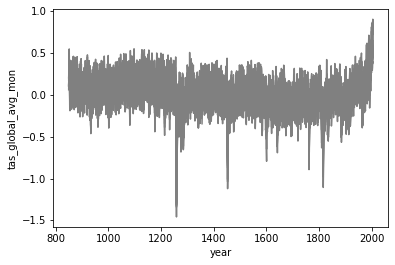

In [18]:
for i in range(0, 10):
    this_line=lme_gmt[i,:]
    this_line.plot(color='grey')


In [30]:
lmr_var=lmr_samples.std()*lmr_samples.std()
print (f"The variance of the Last Millennium Reanalysis is {lmr_var.values} oC^2")
lme_var=lme_samples.std()*lme_samples.std()
print (f"The variance of the Last Millennium Ensemble is {lme_var.values} oC^2")
scaling_ratio=lme_var/lmr_var
print(f"Therefore CESM has a spread that is a factor of {scaling_ratio.values} of reality")


The variance of the Last Millennium Reanalysis is 0.002006108276092479 oC^2
The variance of the Last Millennium Ensemble is 0.010622022390559111 oC^2
Therefore CESM has a spread that is a factor of 5.294840022916813 of reality
